# Project - Correlation in Python

---

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset in pandas dataframe

In [2]:
movies = pd.read_csv('D:/git_repositories/PythonProject1-Correlation_in_Python/Data/movies.csv')

## Showing data

In [3]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Total rows and columns in the data

In [4]:
print("There are total " + str(movies.shape[0]) + " rows and " + str(movies.shape[1]) + " columns in this movies dataset.")

There are total 7668 rows and 15 columns in this movies dataset.


## Data cleaning

---

## Looking at the data types

In [5]:
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## Looking for missing data

In [6]:
movies.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

## Dropping the missing values

In [7]:
movies = movies.dropna()

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


## Changing data type of some columns

In [9]:
# changing budget column data type from float to int
movies['budget'] = movies['budget'].astype('int64')

# changing votes column data type from float to int
movies['votes'] = movies['votes'].astype('int64')

# changing gross column data type from float to int
movies['gross'] = movies['gross'].astype('int64')

## Creating correct year column based on released date column

In [10]:
movies['yearcorrect'] = movies['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [11]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


## Dropping previous year column

In [12]:
movies_new = movies.drop('year', axis = 1)

In [13]:
movies_new.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [14]:
# Renaming yearcorrect column
movies_new = movies_new.rename(
    columns = {
        'yearcorrect' : 'year'
    }
)

---

## Sorting movies data by gross column

In [15]:
movies_new.sort_values(by = 'gross', inplace = False, ascending = False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


## Drop duplicates

In [16]:
movies_new.drop_duplicates()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [17]:
movies_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   released  5421 non-null   object 
 4   score     5421 non-null   float64
 5   votes     5421 non-null   int64  
 6   director  5421 non-null   object 
 7   writer    5421 non-null   object 
 8   star      5421 non-null   object 
 9   country   5421 non-null   object 
 10  budget    5421 non-null   int64  
 11  gross     5421 non-null   int64  
 12  company   5421 non-null   object 
 13  runtime   5421 non-null   float64
 14  year      5421 non-null   int32  
dtypes: float64(2), int32(1), int64(3), object(9)
memory usage: 656.4+ KB


---

## Correlation with Gross Revenue

Now, let's assume that the budget of the films and the company which produced the films, are mostly correlated with the gross revenue the movies generate. The more budget a movie has or the bigger the producton company is the movie revenue should also be higher. Let's check if this hypothesis is correct or not.

### Scatter plot with budget vs. gross

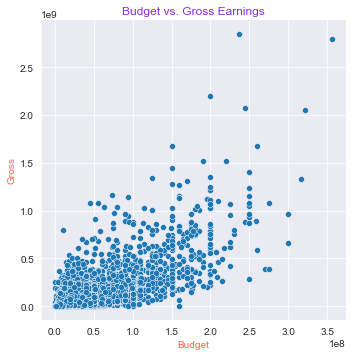

In [18]:
sns.set_style('darkgrid')
sns.relplot(
    x = 'budget',
    y = 'gross',
    data = movies_new,
    kind = 'scatter',
)

plt.title('Budget vs. Gross Earnings', color = 'blueviolet')
plt.xlabel('Budget', color = 'tomato')
plt.ylabel('Gross', color = 'tomato')

plt.show()

### Regression plot (budget vs. gross revenue)

To get a more proper correlation with budget, we will plot a Regression Plot with respect to Revenue.

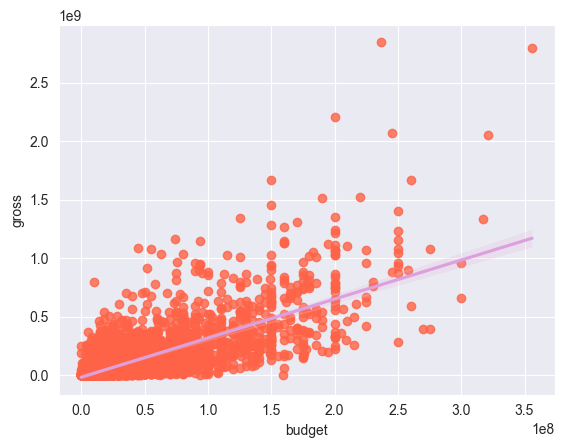

In [19]:
sns.regplot(
    x = 'budget',
    y = 'gross',
    data = movies_new,
    scatter_kws = {'color' : 'tomato'},
    line_kws = {'color' : 'plum'}
)

plt.show()

Now to get the relation more clearly we will try to analyse the dependencies on other paramaters also. Here some of the column are not of int64 or float64 data type. So we can not directly include those data into the correlation heatmap. We will address this problem in a bit.

In [20]:
# Correlation

correlation_matrix = movies_new.corr(method = 'pearson')
correlation_matrix

,score,votes,budget,gross,runtime,year
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


Thus from the table itself, we can understand that gross and budget are highly correlated only. There are different types of correlations pearson, kendall, spearman and all. Here we used the default type that is 'Pearson'.

### Heatmap

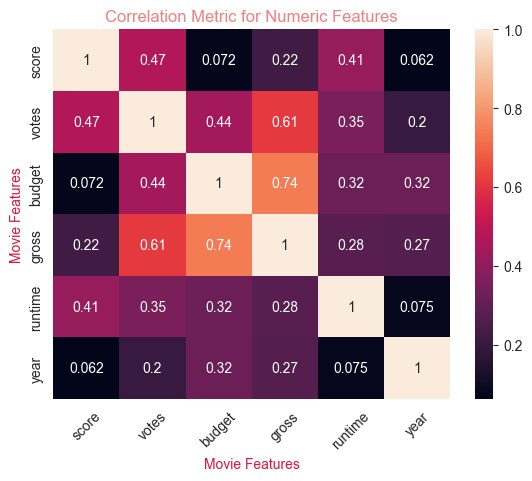

In [21]:
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Metric for Numeric Features', color = 'lightcoral')
plt.xlabel('Movie Features', color = 'crimson')
plt.ylabel('Movie Features', color = 'crimson')
plt.xticks(rotation = 45)
plt.show()

## Numerization of Object Data Types

As we discussed earlier there was a problem with the non numeric data in our DataFrame. They can't be included directly to a heatmap. So, we are going to make the non numeric data to numeric data here.

As our second assumption was that the company name can also have a significant impact on the revenue, let's see how correct that is. But while numerizing the strings of Company Name column, let's numerize the other sitring type columns as well. Then we would be able to look into other factors also aside from Company Data.

In [22]:
movies_numerized = movies_new
for col_name in movies_numerized.columns:
    if(movies_numerized[col_name].dtype == 'object'):
        movies_numerized[col_name] = movies_numerized[col_name].astype('category')
        movies_numerized[col_name] = movies_numerized[col_name].cat.codes
movies_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,4692,6,6,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,1980


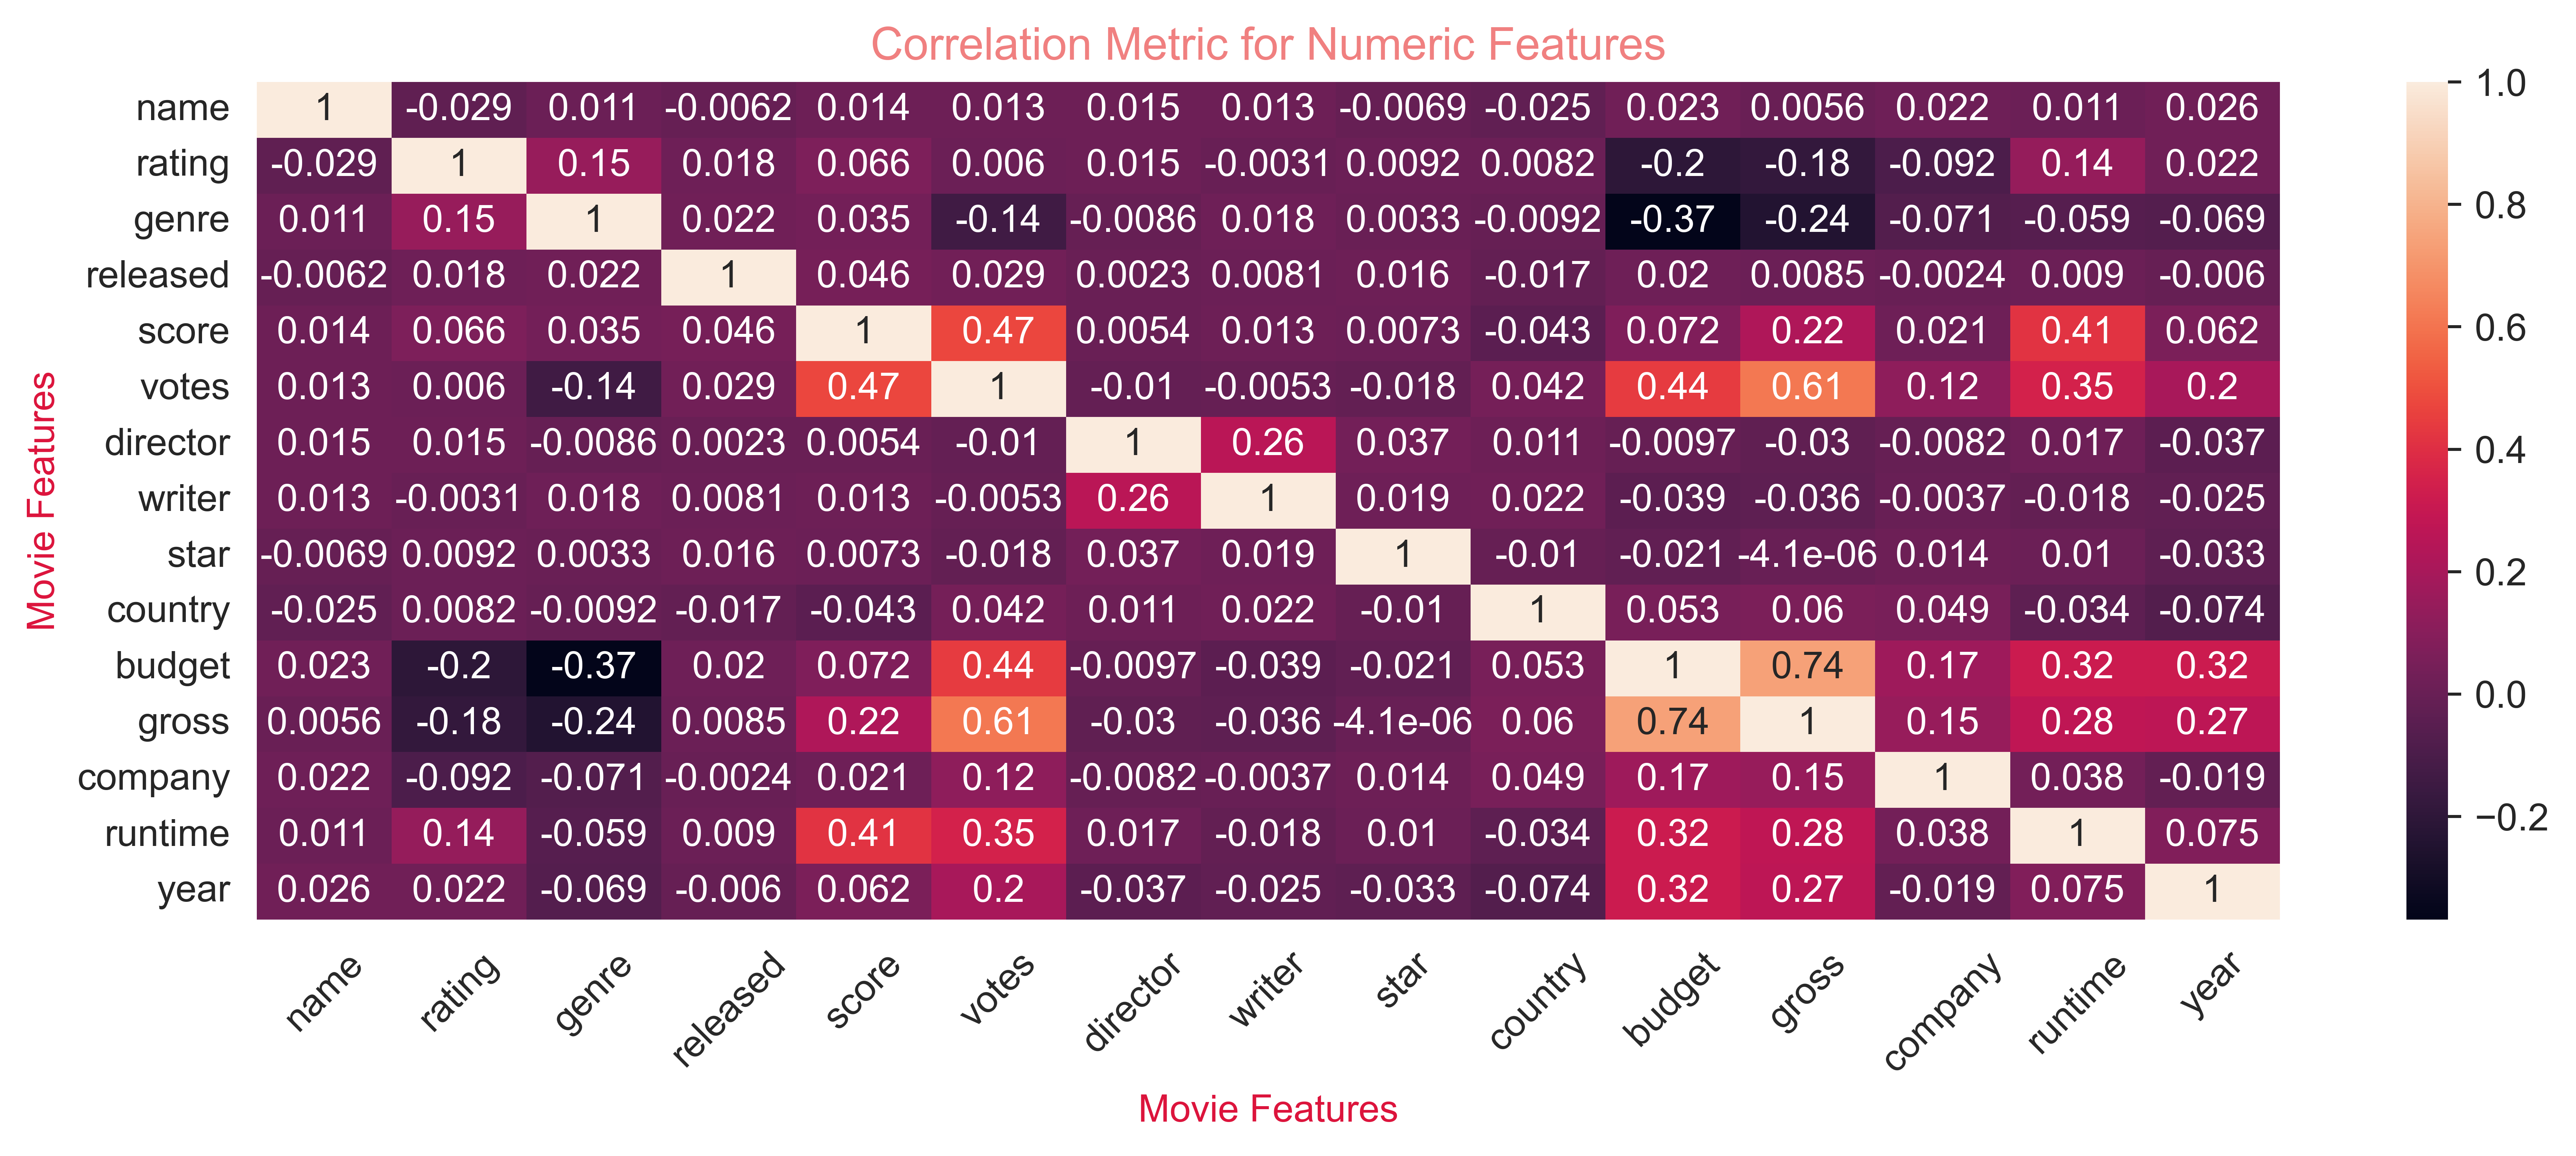

In [38]:
corr_matrix = movies_numerized.corr(method = 'pearson')


fig, ax = plt.subplots(figsize = (12, 4), dpi = 720)

sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Metric for Numeric Features', color = 'lightcoral')
plt.xlabel('Movie Features', color = 'crimson')
plt.ylabel('Movie Features', color = 'crimson')
plt.xticks(rotation = 45)
plt.show()

## Conclusion

Thus from the heat map, we can see although 'votes' and 'budget' impact revenue largely, the company brandings have no correlation with the revnue figure at all.